In [1]:
import matplotlib
matplotlib.use('Agg')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Helpers
import sys
sys.path.insert(0,'../../')
from utils import data_path,results_path,grid_search,estimator_result,cross_validate,rfecv
from scipy.sparse import csr_matrix,save_npz,load_npz
from sklearn.model_selection import cross_val_score,LeaveOneOut,StratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
import pickle

# Algorithms
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
with open('../' + data_path + 'sorted_TCRs_ind.pkl', 'rb') as f:
    TCRs_ind = pickle.load(f)

In [3]:
train_X = load_npz('../'+data_path + 'version_1/'+ 'train_per.npz')
test_X = load_npz('../'+data_path + 'version_1/'+ 'test_per.npz')

train_y = pd.read_csv('../'+data_path + 'train_Y.csv')['CMV_status']
test_y = pd.read_csv('../'+data_path + 'test_Y.csv')['CMV_status']

## RFE

### Top 1000

In [4]:
top_1000 = TCRs_ind[:1000]
# Define a classifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=31, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=5,
        min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
        oob_score=True, random_state=0, verbose=0, warm_start=False)
print(rf)

rfecv = RFECV(rf,cv=StratifiedKFold(10),scoring='roc_auc',step = 0.1)
rfecv.fit(train_X[:,top_1000],train_y)

print("Optimal number of features : %d" % rfecv.n_features_)

print('AUROC:',roc_auc_score(test_y,rfecv.predict_proba(test_X[:,top_1000])[:,1]),'Accuracy: ',accuracy_score(test_y,
        rfecv.predict(test_X[:,top_1000])))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
Optimal number of features : 1000
AUROC: 0.9741403807899971 Accuracy:  0.8583333333333333


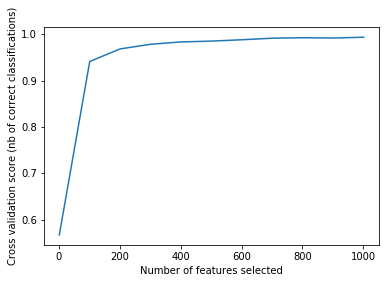

In [5]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,(len(rfecv.grid_scores_))*100,100), rfecv.grid_scores_)

### Top 600

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
Optimal number of features : 550
AUROC: 0.9650468883205456 Accuracy:  0.875


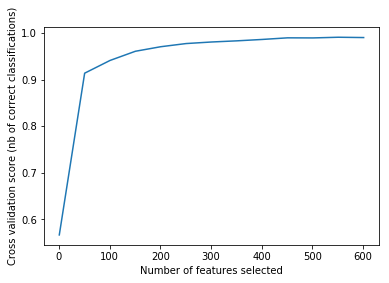

In [6]:
top_600 = TCRs_ind[:600]
# Define a classifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=31, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=5,
        min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
        oob_score=True, random_state=0, verbose=0, warm_start=False)
print(rf)

rfecv = RFECV(rf,cv=StratifiedKFold(10),scoring='roc_auc',step = 50)
rfecv.fit(train_X[:,top_600],train_y)

print("Optimal number of features : %d" % rfecv.n_features_)

print('AUROC:',roc_auc_score(test_y,rfecv.predict_proba(test_X[:,top_600])[:,1]),'Accuracy: ',accuracy_score(test_y,
        rfecv.predict(test_X[:,top_600])))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,(len(rfecv.grid_scores_))*50,50), rfecv.grid_scores_)

### Top 350

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
Optimal number of features : 350
AUROC: 0.9462915601023018 Accuracy:  0.8833333333333333


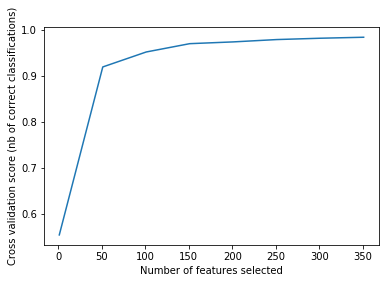

In [7]:
top_350 = TCRs_ind[:350]
# Define a classifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=31, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=5,
        min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
        oob_score=True, random_state=0, verbose=0, warm_start=False)
print(rf)

rfecv = RFECV(rf,cv=StratifiedKFold(10),scoring='roc_auc',step = 50)
rfecv.fit(train_X[:,top_350],train_y)

print("Optimal number of features : %d" % rfecv.n_features_)

print('AUROC:',roc_auc_score(test_y,rfecv.predict_proba(test_X[:,top_350])[:,1]),'Accuracy: ',accuracy_score(test_y,
        rfecv.predict(test_X[:,top_350])))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,(len(rfecv.grid_scores_))*50,50), rfecv.grid_scores_)

### Top 200

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
Optimal number of features : 200
AUROC: 0.9556692242114236 Accuracy:  0.9083333333333333


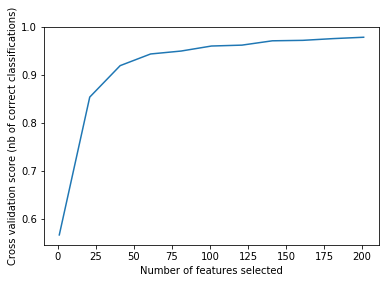

In [8]:
top_200 = TCRs_ind[:200]
# Define a classifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=31, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=5,
        min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
        oob_score=True, random_state=0, verbose=0, warm_start=False)
print(rf)

rfecv = RFECV(rf,cv=StratifiedKFold(10),scoring='roc_auc',step = 20)
rfecv.fit(train_X[:,top_200],train_y)

print("Optimal number of features : %d" % rfecv.n_features_)

print('AUROC:',roc_auc_score(test_y,rfecv.predict_proba(test_X[:,top_200])[:,1]),'Accuracy: ',accuracy_score(test_y,
        rfecv.predict(test_X[:,top_200])))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,(len(rfecv.grid_scores_))*20,20), rfecv.grid_scores_)

### Top 165

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)
Optimal number of features : 155
AUROC: 0.9474282466609832 Accuracy:  0.875


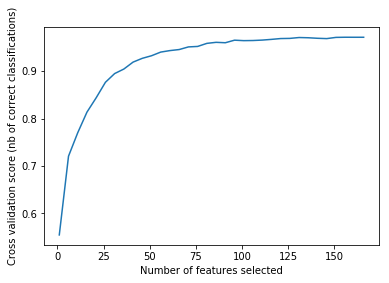

In [9]:
top_165 = TCRs_ind[:165]
# Define a classifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
        max_depth=31, max_features='auto', max_leaf_nodes=None,
        min_impurity_decrease=0.0, min_impurity_split=None,
        min_samples_leaf=1, min_samples_split=5,
        min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
        oob_score=True, random_state=0, verbose=0, warm_start=False)
print(rf)

rfecv = RFECV(rf,cv=StratifiedKFold(10),scoring='roc_auc',step = 5)
rfecv.fit(train_X[:,top_165],train_y)

print("Optimal number of features : %d" % rfecv.n_features_)

print('AUROC:',roc_auc_score(test_y,rfecv.predict_proba(test_X[:,top_165])[:,1]),'Accuracy: ',accuracy_score(test_y,
        rfecv.predict(test_X[:,top_165])))

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,(len(rfecv.grid_scores_))*5,5), rfecv.grid_scores_)

### Choose Top 200

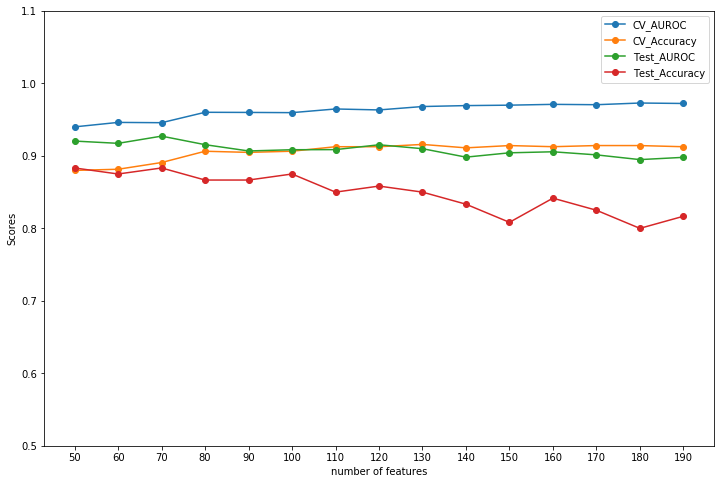

In [17]:
cv_acc = []
cv_auroc = []
test_acc = []
test_auroc = []
for i in range(50,200,10):
    train_X_sub = train_X[:,TCRs_ind[:int(i)]]
    test_X_sub = test_X[:,TCRs_ind[:int(i)]]
    cv_results = cross_validate(rf,train_X_sub,train_y,scoring=('accuracy', 'roc_auc'),cv=StratifiedKFold(10))
    cv_acc.append(np.mean(cv_results['test_accuracy']))
    cv_auroc.append(np.mean(cv_results['test_roc_auc']))

    # fit training set
    rf.fit(X=train_X_sub, y=train_y)

    # predict test_Y
    predict_test = rf.predict(test_X_sub)
    test_acc.append(accuracy_score(test_y, predict_test))

    # AUROC of testing set
    predict_test_prob = rf.predict_proba(test_X_sub)
    pos_prob_test = predict_test_prob[:, 1]
    test_auroc.append(roc_auc_score(test_y, pos_prob_test))
    
    
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
line1 = ax.plot(range(50,200,10),cv_auroc,label='CV_AUROC',marker='o')
line2 = ax.plot(range(50,200,10),cv_acc,label='CV_Accuracy',marker='o')
line3 = ax.plot(range(50,200,10),test_auroc,label='Test_AUROC',marker='o')
line4 = ax.plot(range(50,200,10),test_acc,label='Test_Accuracy',marker='o')

ax.set_ylabel('Scores')
ax.set_xlabel('number of features')
ax.set_xticks(range(50,200,10))
ax.set_yticks(np.arange(0.5,1.1,0.1))
ax.legend(loc='best', bbox_to_anchor=(1,1))

plt.show()

In [32]:
cv_acc = []
cv_auroc = []
test_acc = []
test_auroc = []
for i in range(65,201,1):
    train_X_sub = train_X[:,TCRs_ind[:int(i)]]
    test_X_sub = test_X[:,TCRs_ind[:int(i)]]
    cv_results = cross_validate(rf,train_X_sub,train_y,scoring=('accuracy', 'roc_auc'),cv=StratifiedKFold(10))
    cv_acc = np.mean(cv_results['test_accuracy'])
    cv_auroc = np.mean(cv_results['test_roc_auc'])

    # fit training set
    rf.fit(X=train_X_sub, y=train_y)

    # predict test_Y
    predict_test = rf.predict(test_X_sub)
    acc = accuracy_score(test_y, predict_test)

    # AUROC of testing set
    predict_test_prob = rf.predict_proba(test_X_sub)
    pos_prob_test = predict_test_prob[:, 1]
    auroc = roc_auc_score(test_y, pos_prob_test)
    
    print(i,':')
    print('cv_auroc:',cv_auroc, 'cv_acc:',cv_acc,'auroc:',auroc, 'acc:',acc)

65 :
cv_auroc: 0.9524001094690752 cv_acc: 0.8798977411477411 auroc: 0.9315146348394429 acc: 0.925
66 :
cv_auroc: 0.9520154038626947 cv_acc: 0.8814610042735043 auroc: 0.9329354930377948 acc: 0.925
67 :
cv_auroc: 0.9516729220423802 cv_acc: 0.8860515873015873 auroc: 0.9320829781187837 acc: 0.9333333333333333
68 :
cv_auroc: 0.9515196653373994 cv_acc: 0.8814121642246642 auroc: 0.9317988064791133 acc: 0.9333333333333333
69 :
cv_auroc: 0.9528735632183908 cv_acc: 0.8814362026862026 auroc: 0.9335038363171355 acc: 0.9333333333333333
70 :
cv_auroc: 0.9530932832903277 cv_acc: 0.8892246642246644 auroc: 0.9414606422279056 acc: 0.925
71 :
cv_auroc: 0.9506380483227774 cv_acc: 0.8892487026862028 auroc: 0.9410343847684001 acc: 0.9083333333333333
72 :
cv_auroc: 0.9560886308546408 cv_acc: 0.8907142857142858 auroc: 0.9396135265700483 acc: 0.925
73 :
cv_auroc: 0.9553031902416139 cv_acc: 0.8923256257631259 auroc: 0.9390451832907075 acc: 0.9333333333333333
74 :
cv_auroc: 0.9541385174759558 cv_acc: 0.889248702

143 :
cv_auroc: 0.9685344827586206 cv_acc: 0.9173985042735044 auroc: 0.9434498437055981 acc: 0.875
144 :
cv_auroc: 0.9681388302447417 cv_acc: 0.9142487026862028 auroc: 0.9434498437055983 acc: 0.8666666666666667
145 :
cv_auroc: 0.968540347173352 cv_acc: 0.9127102411477412 auroc: 0.9437340153452686 acc: 0.9083333333333333
146 :
cv_auroc: 0.9686502072093205 cv_acc: 0.9157623626373628 auroc: 0.9431656720659278 acc: 0.8833333333333333
147 :
cv_auroc: 0.9698399014778325 cv_acc: 0.9173744658119659 auroc: 0.9437340153452685 acc: 0.8666666666666667
148 :
cv_auroc: 0.9681525138791148 cv_acc: 0.9127102411477412 auroc: 0.9440181869849389 acc: 0.875
149 :
cv_auroc: 0.9681775353819688 cv_acc: 0.9095852411477413 auroc: 0.9497016197783461 acc: 0.8916666666666667
150 :
cv_auroc: 0.9702441551333176 cv_acc: 0.9111725427350429 auroc: 0.9502699630576869 acc: 0.9083333333333333
151 :
cv_auroc: 0.9690790914066776 cv_acc: 0.9142975427350428 auroc: 0.9497016197783461 acc: 0.875
152 :
cv_auroc: 0.96973473297364

In [28]:
ind = list(TCRs_ind[:67])
train_X_sub = train_X[:,ind]
test_X_sub = test_X[:,ind]
estimator_result(rf,train_X_sub,train_y,test_X_sub,test_y)

********************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

Cross validation:
accuracy score 0.8860515873015873
AUROC 0.9516729220423802
________________________________________________________________________________
Training set:
accuracy score 0.9672386895475819
AUROC 0.9850336190625983
log-loss: 0.15952725443061183
________________________________________________________________________________
Testing set;
accuracy score: 0.9333333333333333
AUROC 0.9320829781187837
log-loss: 0.3117928243504921
classification_report
             precision    recall  f1-score   sup

In [35]:
ind = list(TCRs_ind[:109])
train_X_sub = train_X[:,ind]
test_X_sub = test_X[:,ind]
estimator_result(rf,train_X_sub,train_y,test_X_sub,test_y)

********************************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=31, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

Cross validation:
accuracy score 0.9095612026862028
AUROC 0.9638351317538509
________________________________________________________________________________
Training set:
accuracy score 0.9812792511700468
AUROC 0.9967953759043725
log-loss: 0.13393563602529476
________________________________________________________________________________
Testing set;
accuracy score: 0.9333333333333333
AUROC 0.9508383063370275
log-loss: 0.32638095684183016
classification_report
             precision    recall  f1-score   su